<a href="https://colab.research.google.com/github/youssefkamil/Arabic-Dialect-Identification/blob/main/ML_NLP_Arabic_Dialect_Identification_in_the_Wild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Lib

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
# import arabic_reshaper
import nltk
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from time import time
# import arabicnlp 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#train_predict function

In [ ]:
def train_predict(classifier,X_train,y_train,X_test,y_test, average= 'macro'): 
    '''

    inputs:
       - classifier: the learning algorithm to be trained and predicted on
       - x_train  : train set Features
       - y_train  : train set Labels
       - x_test   : test set Features
       - y_train  : test set Labels
 
    '''
    
    results = {}
    
    # Fit the classifier to the training data and Calculate the time
    start_train = time()
    classifier = classifier.fit(X_train, y_train)
    end_train = time()
    results['train_time'] = round((end_train-start_train), 2)

    # Predict the training/testing labels and Calculate the time
    start_test = time()
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    end_test = time()   
    results['pred_time'] = round((end_test-start_test), 2)
            
    # Model evaluation (training/testing data) using accuracy
    results['acc_train'] = round(accuracy_score(y_train, y_pred_train), 2)
    results['acc_test'] = round(accuracy_score(y_test, y_pred_test), 2)
    
    # Model evaluation (training/testing data) using f1-score
    results['f1_train'] = round(f1_score(y_train, y_pred_train, average= average), 2)
    results['f1_test'] = round(f1_score(y_test, y_pred_test, average= average), 2)
    
    # Display classification_report
    report = classification_report(y_test, y_pred_test)
       
    
    # Return the results
    return results, report

#**Load cleaned data first approach**

In [ ]:
clean_df=pd.read_csv('/content/drive/MyDrive/Arabic Dialect/cleaned tweets.csv',lineterminator='\n')

In [ ]:
clean_df

,Unnamed: 0,id,dialect,tweet
0,0,1.175358e+18,IQ,لكن بالنهايه ينتفض يغير
1,1,1.175416e+18,IQ,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلب...
2,2,1.175450e+18,IQ,مبين من كلامه خليجي
3,3,1.175471e+18,IQ,يسلملي مرورك وروحك الحلوه
4,4,1.175497e+18,IQ,وين هل الغيبه اخ محمد
...,...,...,...,...
458193,458193,1.019485e+18,BH,مبسوطين منك اللي باسطانا
458194,458194,1.021083e+18,BH,والله ماينده ابش يختي
458195,458195,1.017478e+18,BH,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بت...
458196,458196,1.022430e+18,BH,الله يبارك فيها وبالعافيه


In [ ]:
clean_df=clean_df.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

X=clean_df['tweet'].values.tolist()
y=pd.get_dummies(clean_df['dialect'].values)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

##ConutVectorizer
###ngram_range = (1, 2) , max_features=1,500,000


In [ ]:
cv = CountVectorizer(binary=False,ngram_range=(1,2),
                     max_features=1500000,
                    #  min_df=2
                     )
cv.fit(x_train)
print("vocabulary : ",len(cv.vocabulary_))

vocabulary :  1500000


In [ ]:
cv.vocabulary_

{'وش': 1282940,
 'هالمقارنه': 1175705,
 'الزق': 58145,
 'مجموعتكم': 938789,
 'اسهل': 20712,
 'من': 1038986,
 'مجموعتنا': 938794,
 'يعني': 1618236,
 'تلعب': 201589,
 'ضد': 290208,
 'فرق': 416129,
 'سهله': 267598,
 'وتقارن': 1222737,
 'نفسك': 1147486,
 'فيني': 471238,
 'ايش': 129992,
 'الهبل': 100560,
 'هذا': 1177983,
 'وش هالمقارنه': 1284178,
 'مجموعتكم اسهل': 938790,
 'اسهل من': 20730,
 'مجموعتنا يعني': 938800,
 'يعني تلعب': 1620150,
 'تلعب ضد': 201609,
 'ضد فرق': 290406,
 'فرق سهله': 416315,
 'وتقارن نفسك': 1222739,
 'نفسك فيني': 1148010,
 'فيني ايش': 471361,
 'ايش الهبل': 130034,
 'الهبل هذا': 100576,
 'لا': 643418,
 'يسوي': 1589365,
 'اجتماع': 5631,
 'علشان': 308274,
 'يبرز': 1515633,
 'هيبته': 1187373,
 'لا يسوي': 651627,
 'يسوي اجتماع': 1589371,
 'يبرز هيبته': 1515644,
 'واحد': 1190156,
 'ليل': 804356,
 'نهار': 1165907,
 'بيهاجم': 179647,
 'مصر': 1009364,
 'ورءيسها': 1261820,
 'وحكومتها': 1246787,
 'وشعبها': 1287079,
 'منتظر': 1047507,
 'ايه': 130648,
 'الجبله': 46479,
 'ده': 2425

In [ ]:
x_train_cv = cv.transform(x_train)
x_test_cv = cv.transform(x_test) 

###Models training

In [ ]:
clf_MNB = MultinomialNB()
clf_LR = LogisticRegression()
clf_SVM=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,
                      # max_iter=100,
                      tol=None)
clf_list = [ clf_MNB, clf_LR, clf_SVM]

# Compare evaluation of the different classifiers
clf_evaluation = {}
clf_report = {}

for clf in clf_list:
    clf_evaluation[clf.__class__.__name__], clf_report[clf.__class__.__name__] = train_predict(clf,
                                                                                              x_train_cv,
                                                                                              np.argmax(y_train.to_numpy(), axis=1),
                                                                                              x_test_cv,
                                                                                              np.argmax(y_test.to_numpy(), axis=1)
                                                                                              )
    print(clf_evaluation )

{'MultinomialNB': {'train_time': 2.48, 'pred_time': 1.06, 'acc_train': 0.74, 'acc_test': 0.47, 'f1_train': 0.69, 'f1_test': 0.38}}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'MultinomialNB': {'train_time': 2.48, 'pred_time': 1.06, 'acc_train': 0.74, 'acc_test': 0.47, 'f1_train': 0.69, 'f1_test': 0.38}, 'LogisticRegression': {'train_time': 711.66, 'pred_time': 0.95, 'acc_train': 0.87, 'acc_test': 0.53, 'f1_train': 0.86, 'f1_test': 0.5}}
{'MultinomialNB': {'train_time': 2.48, 'pred_time': 1.06, 'acc_train': 0.74, 'acc_test': 0.47, 'f1_train': 0.69, 'f1_test': 0.38}, 'LogisticRegression': {'train_time': 711.66, 'pred_time': 0.95, 'acc_train': 0.87, 'acc_test': 0.53, 'f1_train': 0.86, 'f1_test': 0.5}, 'SGDClassifier': {'train_time': 4067.53, 'pred_time': 1.9, 'acc_train': 0.76, 'acc_test': 0.5, 'f1_train': 0.75, 'f1_test': 0.45}}


In [ ]:
clf_evaluation

{'LogisticRegression': {'acc_test': 0.53,
  'acc_train': 0.87,
  'f1_test': 0.5,
  'f1_train': 0.86,
  'pred_time': 0.95,
  'train_time': 711.66},
 'MultinomialNB': {'acc_test': 0.47,
  'acc_train': 0.74,
  'f1_test': 0.38,
  'f1_train': 0.69,
  'pred_time': 1.06,
  'train_time': 2.48},
 'SGDClassifier': {'acc_test': 0.5,
  'acc_train': 0.76,
  'f1_test': 0.45,
  'f1_train': 0.75,
  'pred_time': 1.9,
  'train_time': 4067.53}}

In [ ]:
legend = []
for i in range(len(clf_list)):
    legend.append(clf_list[i].__class__.__name__)
def eval_plot(labels, y_label, title):

    clf1 = [clf_evaluation[legend[0]][labels[0]], clf_evaluation[legend[0]][labels[1]]]
    clf2 = [clf_evaluation[legend[1]][labels[0]], clf_evaluation[legend[1]][labels[1]]]
    clf3 = [clf_evaluation[legend[2]][labels[0]], clf_evaluation[legend[2]][labels[1]]]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x - width/2, clf1, width, label=legend[0])
    ax.bar(x + width/2, clf2, width, label=legend[1])
    ax.bar(x + width*3/2, clf3, width, label=legend[2])

    # Add labels, title, and legend
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Add bars annotation
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+(width/2), i.get_height()+0.01,
                str(i.get_height()), fontsize=11,
                color='black', ha='center')

    plt.show()

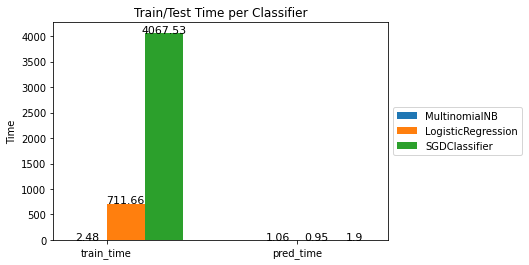

In [ ]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title)

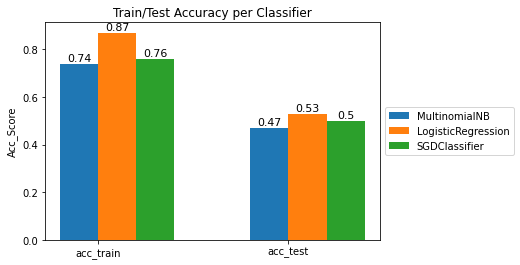

In [ ]:
labels = ['acc_train', 'acc_test']
y_label = 'Acc_Score'
title = 'Train/Test Accuracy per Classifier'
eval_plot(labels, y_label, title)

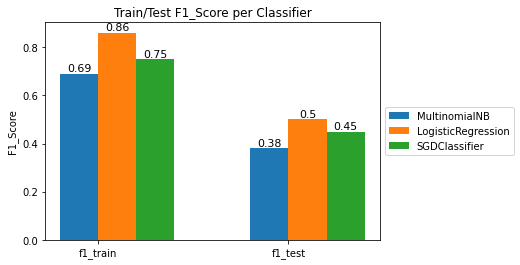

In [ ]:
labels = ['f1_train', 'f1_test']
y_label = 'F1_Score'
title = 'Train/Test F1_Score per Classifier'
eval_plot(labels, y_label, title)

##ConutVectorizer
###ngram_range = (1, 1) 


In [ ]:
cv = CountVectorizer(binary=False,ngram_range=(1,1),

                     )
cv.fit(x_train)
print("vocabulary : ",len(cv.vocabulary_))

vocabulary :  446722


In [ ]:
cv.vocabulary_

{'عندي': 219190,
 'عمل': 218535,
 'له': 267524,
 'يتواصل': 424836,
 'معي': 303792,
 'الخاص': 37316,
 'بعدين': 106084,
 'وش': 380287,
 'لقفك': 259092,
 'داخل': 172317,
 'حسابات': 161596,
 'القطريين': 53488,
 'تنبش': 147912,
 'وراهم': 376899,
 'ذابحتكم': 177058,
 'الغيره': 50589,
 'والقهر': 353016,
 'فخريه': 228269,
 'البصري': 29544,
 'ياسويداني': 416847,
 'خلونه': 170865,
 'نلعب': 324861,
 'سله': 190267,
 'بس': 102105,
 'دا': 172154,
 'متسهوك': 288761,
 'قوي': 239173,
 'بيقلك': 124092,
 'مشاعري': 299031,
 'وولاء': 406415,
 'غلب': 222509,
 'شحاته': 194810,
 'ابو': 2184,
 'كف': 243662,
 'سهرانهانا': 191428,
 'من': 308682,
 'اكتر': 22972,
 'الاغاني': 26165,
 'اللي': 56664,
 'مفرحني': 304931,
 'نجاحها': 317934,
 'الكبير': 54398,
 'تحديدا': 131782,
 'بمصر': 112077,
 'ولكل': 392982,
 'يسالني': 430466,
 'عن': 218918,
 'تعاون': 140912,
 'مع': 301934,
 'الفنان': 52269,
 'تامر': 127113,
 'عاشور': 209375,
 'احنا': 8683,
 'سبق': 187381,
 'وتعاوننا': 368287,
 'بهذه': 116333,
 'الاغنيه': 26207,
 'وهي

In [ ]:
x_train_cv = cv.transform(x_train)
x_test_cv = cv.transform(x_test) 

###Models training

In [ ]:
clf_MNB = MultinomialNB()
clf_LR = LogisticRegression()
clf_SVM=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,
                      # max_iter=100,
                      tol=None)
clf_list = [ clf_MNB, clf_LR, clf_SVM]

# Compare evaluation of the different classifiers
clf_evaluation = {}
clf_report = {}

for clf in clf_list:
    clf_evaluation[clf.__class__.__name__], clf_report[clf.__class__.__name__] = train_predict(clf,
                                                                                              x_train_cv,
                                                                                              np.argmax(y_train.to_numpy(), axis=1),
                                                                                              x_test_cv,
                                                                                              np.argmax(y_test.to_numpy(), axis=1)
                                                                                              )
    print(clf_evaluation )

{'MultinomialNB': {'train_time': 1.45, 'pred_time': 0.52, 'acc_train': 0.64, 'acc_test': 0.49, 'f1_train': 0.59, 'f1_test': 0.4}}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'MultinomialNB': {'train_time': 1.45, 'pred_time': 0.52, 'acc_train': 0.64, 'acc_test': 0.49, 'f1_train': 0.59, 'f1_test': 0.4}, 'LogisticRegression': {'train_time': 280.66, 'pred_time': 0.46, 'acc_train': 0.72, 'acc_test': 0.52, 'f1_train': 0.71, 'f1_test': 0.5}}
{'MultinomialNB': {'train_time': 1.45, 'pred_time': 0.52, 'acc_train': 0.64, 'acc_test': 0.49, 'f1_train': 0.59, 'f1_test': 0.4}, 'LogisticRegression': {'train_time': 280.66, 'pred_time': 0.46, 'acc_train': 0.72, 'acc_test': 0.52, 'f1_train': 0.71, 'f1_test': 0.5}, 'SGDClassifier': {'train_time': 3087.42, 'pred_time': 0.47, 'acc_train': 0.66, 'acc_test': 0.49, 'f1_train': 0.64, 'f1_test': 0.44}}


In [ ]:
clf_evaluation

{'LogisticRegression': {'acc_test': 0.52,
  'acc_train': 0.72,
  'f1_test': 0.5,
  'f1_train': 0.71,
  'pred_time': 0.46,
  'train_time': 280.66},
 'MultinomialNB': {'acc_test': 0.49,
  'acc_train': 0.64,
  'f1_test': 0.4,
  'f1_train': 0.59,
  'pred_time': 0.52,
  'train_time': 1.45},
 'SGDClassifier': {'acc_test': 0.49,
  'acc_train': 0.66,
  'f1_test': 0.44,
  'f1_train': 0.64,
  'pred_time': 0.47,
  'train_time': 3087.42}}

In [ ]:
legend = []
for i in range(len(clf_list)):
    legend.append(clf_list[i].__class__.__name__)
def eval_plot(labels, y_label, title):

    clf1 = [clf_evaluation[legend[0]][labels[0]], clf_evaluation[legend[0]][labels[1]]]
    clf2 = [clf_evaluation[legend[1]][labels[0]], clf_evaluation[legend[1]][labels[1]]]
    clf3 = [clf_evaluation[legend[2]][labels[0]], clf_evaluation[legend[2]][labels[1]]]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x - width/2, clf1, width, label=legend[0])
    ax.bar(x + width/2, clf2, width, label=legend[1])
    ax.bar(x + width*3/2, clf3, width, label=legend[2])

    # Add labels, title, and legend
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Add bars annotation
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+(width/2), i.get_height()+0.01,
                str(i.get_height()), fontsize=11,
                color='black', ha='center')

    plt.show()

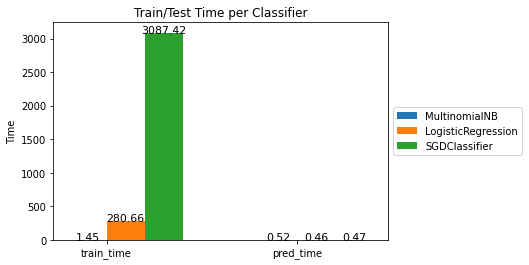

In [ ]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title)

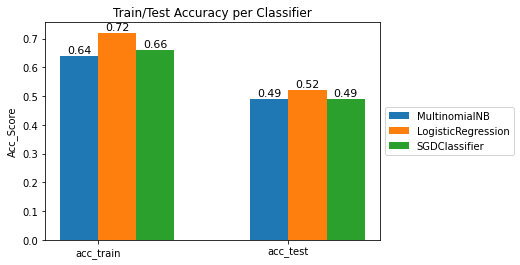

In [ ]:
labels = ['acc_train', 'acc_test']
y_label = 'Acc_Score'
title = 'Train/Test Accuracy per Classifier'
eval_plot(labels, y_label, title)

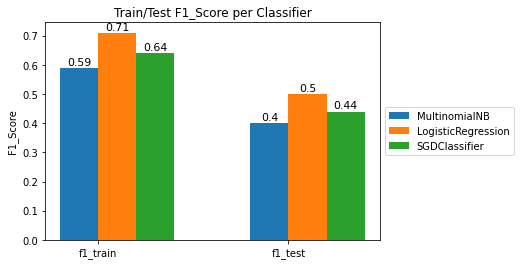

In [ ]:
labels = ['f1_train', 'f1_test']
y_label = 'F1_Score'
title = 'Train/Test F1_Score per Classifier'
eval_plot(labels, y_label, title)

##TFIDF

In [ ]:
cv = TfidfVectorizer()
cv.fit(x_train)
print("vocabulary : ",len(cv.vocabulary_))

vocabulary :  446722


In [ ]:
cv.vocabulary_

{'عندي': 219190,
 'عمل': 218535,
 'له': 267524,
 'يتواصل': 424836,
 'معي': 303792,
 'الخاص': 37316,
 'بعدين': 106084,
 'وش': 380287,
 'لقفك': 259092,
 'داخل': 172317,
 'حسابات': 161596,
 'القطريين': 53488,
 'تنبش': 147912,
 'وراهم': 376899,
 'ذابحتكم': 177058,
 'الغيره': 50589,
 'والقهر': 353016,
 'فخريه': 228269,
 'البصري': 29544,
 'ياسويداني': 416847,
 'خلونه': 170865,
 'نلعب': 324861,
 'سله': 190267,
 'بس': 102105,
 'دا': 172154,
 'متسهوك': 288761,
 'قوي': 239173,
 'بيقلك': 124092,
 'مشاعري': 299031,
 'وولاء': 406415,
 'غلب': 222509,
 'شحاته': 194810,
 'ابو': 2184,
 'كف': 243662,
 'سهرانهانا': 191428,
 'من': 308682,
 'اكتر': 22972,
 'الاغاني': 26165,
 'اللي': 56664,
 'مفرحني': 304931,
 'نجاحها': 317934,
 'الكبير': 54398,
 'تحديدا': 131782,
 'بمصر': 112077,
 'ولكل': 392982,
 'يسالني': 430466,
 'عن': 218918,
 'تعاون': 140912,
 'مع': 301934,
 'الفنان': 52269,
 'تامر': 127113,
 'عاشور': 209375,
 'احنا': 8683,
 'سبق': 187381,
 'وتعاوننا': 368287,
 'بهذه': 116333,
 'الاغنيه': 26207,
 'وهي

In [ ]:
x_train_cv = cv.transform(x_train)
x_test_cv = cv.transform(x_test) 

###Models training

In [ ]:
clf_MNB = MultinomialNB()
clf_LR = LogisticRegression()
clf_SVM=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,
                      # max_iter=100,
                      tol=None)
clf_list = [ clf_MNB, clf_LR, clf_SVM]

# Compare evaluation of the different classifiers
clf_evaluation = {}
clf_report = {}

for clf in clf_list:
    clf_evaluation[clf.__class__.__name__], clf_report[clf.__class__.__name__] = train_predict(clf,
                                                                                              x_train_cv,
                                                                                              np.argmax(y_train.to_numpy(), axis=1),
                                                                                              x_test_cv,
                                                                                              np.argmax(y_test.to_numpy(), axis=1)
                                                                                              )
    print(clf_evaluation )

{'MultinomialNB': {'train_time': 0.85, 'pred_time': 0.43, 'acc_train': 0.49, 'acc_test': 0.4, 'f1_train': 0.37, 'f1_test': 0.26}}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'MultinomialNB': {'train_time': 0.85, 'pred_time': 0.43, 'acc_train': 0.49, 'acc_test': 0.4, 'f1_train': 0.37, 'f1_test': 0.26}, 'LogisticRegression': {'train_time': 291.0, 'pred_time': 0.42, 'acc_train': 0.61, 'acc_test': 0.51, 'f1_train': 0.58, 'f1_test': 0.47}}
{'MultinomialNB': {'train_time': 0.85, 'pred_time': 0.43, 'acc_train': 0.49, 'acc_test': 0.4, 'f1_train': 0.37, 'f1_test': 0.26}, 'LogisticRegression': {'train_time': 291.0, 'pred_time': 0.42, 'acc_train': 0.61, 'acc_test': 0.51, 'f1_train': 0.58, 'f1_test': 0.47}, 'SGDClassifier': {'train_time': 3262.03, 'pred_time': 0.52, 'acc_train': 0.74, 'acc_test': 0.49, 'f1_train': 0.74, 'f1_test': 0.45}}


In [ ]:
clf_evaluation

{'LogisticRegression': {'acc_test': 0.51,
  'acc_train': 0.61,
  'f1_test': 0.47,
  'f1_train': 0.58,
  'pred_time': 0.42,
  'train_time': 291.0},
 'MultinomialNB': {'acc_test': 0.4,
  'acc_train': 0.49,
  'f1_test': 0.26,
  'f1_train': 0.37,
  'pred_time': 0.43,
  'train_time': 0.85},
 'SGDClassifier': {'acc_test': 0.49,
  'acc_train': 0.74,
  'f1_test': 0.45,
  'f1_train': 0.74,
  'pred_time': 0.52,
  'train_time': 3262.03}}

In [ ]:
legend = []
for i in range(len(clf_list)):
    legend.append(clf_list[i].__class__.__name__)
def eval_plot(labels, y_label, title):

    clf1 = [clf_evaluation[legend[0]][labels[0]], clf_evaluation[legend[0]][labels[1]]]
    clf2 = [clf_evaluation[legend[1]][labels[0]], clf_evaluation[legend[1]][labels[1]]]
    clf3 = [clf_evaluation[legend[2]][labels[0]], clf_evaluation[legend[2]][labels[1]]]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x - width/2, clf1, width, label=legend[0])
    ax.bar(x + width/2, clf2, width, label=legend[1])
    ax.bar(x + width*3/2, clf3, width, label=legend[2])

    # Add labels, title, and legend
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Add bars annotation
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+(width/2), i.get_height()+0.01,
                str(i.get_height()), fontsize=11,
                color='black', ha='center')

    plt.show()

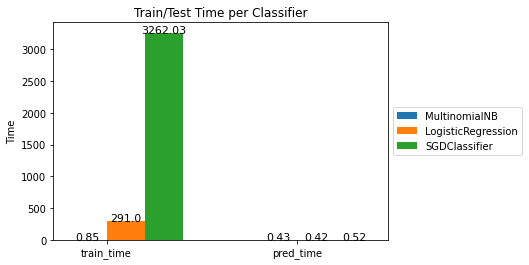

In [ ]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title)

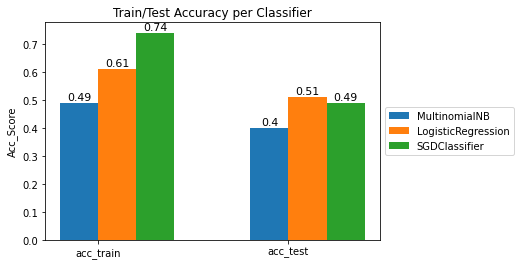

In [ ]:
labels = ['acc_train', 'acc_test']
y_label = 'Acc_Score'
title = 'Train/Test Accuracy per Classifier'
eval_plot(labels, y_label, title)

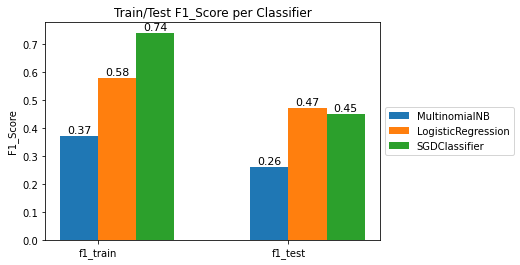

In [ ]:
labels = ['f1_train', 'f1_test']
y_label = 'F1_Score'
title = 'Train/Test F1_Score per Classifier'
eval_plot(labels, y_label, title)

#**Load cleaned data second approach**

In [ ]:
clean_df_train=pd.read_csv('/content/drive/MyDrive/Arabic Dialect/cleaned tweets train set 2.csv',lineterminator='\n')
clean_df_test=pd.read_csv('/content/drive/MyDrive/Arabic Dialect/cleaned tweets Test set 2.csv',lineterminator='\n')

clean_df_train=clean_df_train.dropna()
clean_df_test=clean_df_test.dropna()

x_train=clean_df_train['tweet']
y_train=pd.get_dummies(clean_df_train['dialect'])
x_test=clean_df_test['tweet']
y_test=pd.get_dummies(clean_df_test['dialect'])

##ConutVectorizer
###ngram_range = (1, 1) 


In [ ]:
cv = CountVectorizer(binary=False,ngram_range=(1,1),

                     )
cv.fit(x_train)
print("vocabulary : ",len(cv.vocabulary_))

vocabulary :  228088


In [ ]:
cv.vocabulary_

{'لكن': 132240,
 'ال': 18888,
 'نهاي': 178772,
 'ينتفض': 225627,
 'يغير': 222302,
 'يعني': 221833,
 'هذا': 186502,
 'محسوب': 154229,
 'علي': 108904,
 'بشر': 34110,
 'حي': 71032,
 'ون': 201724,
 'وحشي': 195123,
 'تطلب': 52842,
 'من': 165865,
 'غرب': 111931,
 'يحترمكم': 214705,
 'يءمن': 204035,
 'دين': 79013,
 'كم': 125501,
 'ولاينعتكم': 199064,
 'إرهاب': 1588,
 'مبين': 150006,
 'كلام': 124780,
 'خليجي': 74456,
 'يسلملي': 218980,
 'مرور': 157102,
 'روح': 82731,
 'حلو': 69717,
 'وين': 203806,
 'هل': 187473,
 'غيب': 112952,
 'أخ': 815,
 'محمد': 154494,
 'ياخي': 205438,
 'إرهابي': 1589,
 'إذ': 1571,
 'كان': 122674,
 'عراقي': 106652,
 'سعودي': 87896,
 'فلسطيني': 116387,
 'مشكل': 159747,
 'باب': 27911,
 'فرضخليجي': 115108,
 'ماعنده': 142397,
 'رحم': 81232,
 'مساس': 157740,
 'بقدسيتك': 35807,
 'اله': 20047,
 'يرضي': 217307,
 'عن': 109892,
 'خلص': 74221,
 'مشاكل': 159228,
 'عرب': 106682,
 'اختلف': 8534,
 'نا': 171234,
 'بجنسيت': 31378,
 'أبو': 695,
 'طفل': 100737,
 'مغرد': 162902,
 'ين': 225345

In [ ]:
x_train_cv = cv.transform(x_train)
x_test_cv = cv.transform(x_test) 

###Models training

In [ ]:
clf_MNB = MultinomialNB()
clf_LR = LogisticRegression()
clf_SVM=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,
                      # max_iter=100,
                      tol=None)
clf_list = [ clf_MNB, clf_LR, clf_SVM]

# Compare evaluation of the different classifiers
clf_evaluation = {}
clf_report = {}

for clf in clf_list:
    clf_evaluation[clf.__class__.__name__], clf_report[clf.__class__.__name__] = train_predict(clf,
                                                                                              x_train_cv,
                                                                                              np.argmax(y_train.to_numpy(), axis=1),
                                                                                              x_test_cv,
                                                                                              np.argmax(y_test.to_numpy(), axis=1)
                                                                                              )
    print(clf_evaluation )

{'MultinomialNB': {'train_time': 0.51, 'pred_time': 0.33, 'acc_train': 0.56, 'acc_test': 0.39, 'f1_train': 0.49, 'f1_test': 0.37}}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'MultinomialNB': {'train_time': 0.51, 'pred_time': 0.33, 'acc_train': 0.56, 'acc_test': 0.39, 'f1_train': 0.49, 'f1_test': 0.37}, 'LogisticRegression': {'train_time': 194.04, 'pred_time': 0.35, 'acc_train': 0.53, 'acc_test': 0.45, 'f1_train': 0.49, 'f1_test': 0.45}}
{'MultinomialNB': {'train_time': 0.51, 'pred_time': 0.33, 'acc_train': 0.56, 'acc_test': 0.39, 'f1_train': 0.49, 'f1_test': 0.37}, 'LogisticRegression': {'train_time': 194.04, 'pred_time': 0.35, 'acc_train': 0.53, 'acc_test': 0.45, 'f1_train': 0.49, 'f1_test': 0.45}, 'SGDClassifier': {'train_time': 2981.22, 'pred_time': 0.37, 'acc_train': 0.56, 'acc_test': 0.43, 'f1_train': 0.54, 'f1_test': 0.41}}


In [ ]:
clf_evaluation

{'LogisticRegression': {'acc_test': 0.45,
  'acc_train': 0.53,
  'f1_test': 0.45,
  'f1_train': 0.49,
  'pred_time': 0.35,
  'train_time': 194.04},
 'MultinomialNB': {'acc_test': 0.39,
  'acc_train': 0.56,
  'f1_test': 0.37,
  'f1_train': 0.49,
  'pred_time': 0.33,
  'train_time': 0.51},
 'SGDClassifier': {'acc_test': 0.43,
  'acc_train': 0.56,
  'f1_test': 0.41,
  'f1_train': 0.54,
  'pred_time': 0.37,
  'train_time': 2981.22}}

In [ ]:
legend = []
for i in range(len(clf_list)):
    legend.append(clf_list[i].__class__.__name__)
def eval_plot(labels, y_label, title):

    clf1 = [clf_evaluation[legend[0]][labels[0]], clf_evaluation[legend[0]][labels[1]]]
    clf2 = [clf_evaluation[legend[1]][labels[0]], clf_evaluation[legend[1]][labels[1]]]
    clf3 = [clf_evaluation[legend[2]][labels[0]], clf_evaluation[legend[2]][labels[1]]]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x - width/2, clf1, width, label=legend[0])
    ax.bar(x + width/2, clf2, width, label=legend[1])
    ax.bar(x + width*3/2, clf3, width, label=legend[2])

    # Add labels, title, and legend
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Add bars annotation
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+(width/2), i.get_height()+0.01,
                str(i.get_height()), fontsize=11,
                color='black', ha='center')

    plt.show()

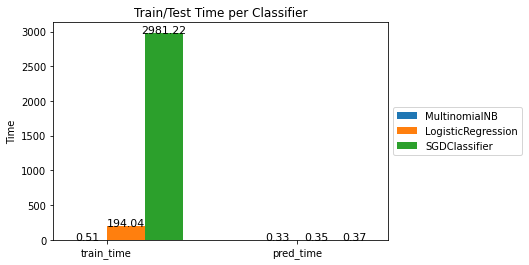

In [ ]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title)

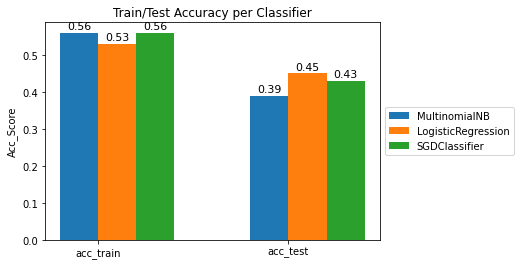

In [ ]:
labels = ['acc_train', 'acc_test']
y_label = 'Acc_Score'
title = 'Train/Test Accuracy per Classifier'
eval_plot(labels, y_label, title)

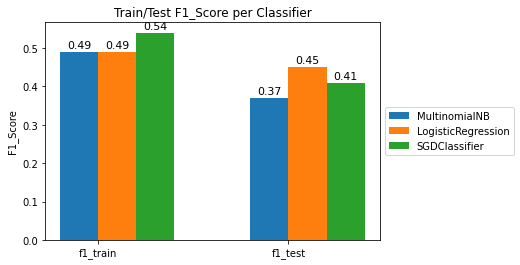

In [ ]:
labels = ['f1_train', 'f1_test']
y_label = 'F1_Score'
title = 'Train/Test F1_Score per Classifier'
eval_plot(labels, y_label, title)

#Mazajak
Didn't work well with me

In [ ]:
!wget http://mazajak.inf.ed.ac.uk:8000/get_sg_100 -O mazajak.bin

--2022-03-11 00:43:00--  http://mazajak.inf.ed.ac.uk:8000/get_sg_100
Resolving mazajak.inf.ed.ac.uk (mazajak.inf.ed.ac.uk)... 129.215.216.121, 2001:630:3c1:216:1a66:daff:fe4d:ef10
Connecting to mazajak.inf.ed.ac.uk (mazajak.inf.ed.ac.uk)|129.215.216.121|:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5325297114 (5.0G) [application/octet-stream]
Saving to: ‘mazajak.bin’

mazajak.bin         100%[===================>]   4.96G  31.0MB/s    in 2m 43s  

2022-03-11 00:45:44 (31.1 MB/s) - ‘mazajak.bin’ saved [5325297114/5325297114]



In [ ]:
from gensim.models import KeyedVectors
word2vec=KeyedVectors.load_word2vec_format("/content/mazajak.bin",
                                           binary=True, unicode_errors='ignore')
print("found %s word vectors of word2vec" % len(word2vec.vocab))

found 4347845 word vectors of word2vec


In [ ]:
word2vec.similarity("مصر","القاهرة")

0.71990234

In [ ]:
word2vec.vocab

{'</s>': <gensim.models.keyedvectors.Vocab at 0x7fa0511a4cd0>,
 'من': <gensim.models.keyedvectors.Vocab at 0x7fa054c60450>,
 'في': <gensim.models.keyedvectors.Vocab at 0x7fa054c60710>,
 'الله': <gensim.models.keyedvectors.Vocab at 0x7fa062723ad0>,
 'و': <gensim.models.keyedvectors.Vocab at 0x7fa05119d4d0>,
 'لا': <gensim.models.keyedvectors.Vocab at 0x7fa0511c4310>,
 'على': <gensim.models.keyedvectors.Vocab at 0x7fa0511c4090>,
 'ما': <gensim.models.keyedvectors.Vocab at 0x7fa0511c4890>,
 'كل': <gensim.models.keyedvectors.Vocab at 0x7fa0511c4290>,
 '️': <gensim.models.keyedvectors.Vocab at 0x7fa05119d510>,
 'اللهم': <gensim.models.keyedvectors.Vocab at 0x7fa0511c4210>,
 'يا': <gensim.models.keyedvectors.Vocab at 0x7fa0511c4610>,
 'اللي': <gensim.models.keyedvectors.Vocab at 0x7fa0511c46d0>,
 'ولا': <gensim.models.keyedvectors.Vocab at 0x7fa0511c4450>,
 'أن': <gensim.models.keyedvectors.Vocab at 0x7fa0511c4710>,
 'عن': <gensim.models.keyedvectors.Vocab at 0x7fa0511c4790>,
 'انا': <gensim

In [ ]:
word2vec.wv

In [ ]:
word2vec_feature = []

# adds the word2vec average
for tweet in x_train:
    average_vec = np.zeros(300)
    for word in tweet:
        if word in word2vec.wv:
            average_vec += (word2vec.wv[word] / len(tweet))
        else:
            pass
    word2vec_feature.append(average_vec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [ ]:
len(word2vec_feature)

412375

In [ ]:
len(y_train)

412375

In [ ]:
x_train_vec=word2vec_feature
y_train_vec=y_train

In [ ]:
word2vec_feature = []

# adds the word2vec average
for tweet in x_test:
    average_vec = np.zeros(300)
    for word in tweet:
        if word in word2vec.wv:
            average_vec += (word2vec.wv[word] / len(tweet))
        else:
            pass
    word2vec_feature.append(average_vec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [ ]:
x_test_vec=word2vec_feature
y_test_vec=y_test

In [ ]:
word2vec_feature = []

# adds the word2vec average
for tweet in x_test:
    average_vec = np.zeros(300)
    for word in tweet:
        if word in word2vec.wv:
            average_vec += (word2vec.wv[word] / len(tweet))
        else:
            pass
    word2vec_feature.append(average_vec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [ ]:
x_test_vec=word2vec_feature
y_test_vec=y_test

In [ ]:
tweets_list=[]
# adds the word2vec average
for tweet in x_train[0:100000]:
    i=0
    one_tweet=[]
    for i in range(20):
      if i<len(tweet):
        if tweet[i] in word2vec.wv:
            one_tweet.append(word2vec.wv[tweet[i]])
        else:
            one_tweet.append( np.zeros(300))
      else:
        one_tweet.append( np.zeros(300))
    tweets_list.append(one_tweet)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [ ]:
del word2vec

In [ ]:
x_train_vec=np.array(tweets_list)
x_train_vec=x_train_vec.reshape(x_train_vec.shape[0],-1)

In [ ]:
del  tweets_list

In [ ]:
y_train_vec=y_train[0:100000]

##LR Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from time import time
def train_predict(classifier,X_train,y_train,X_test,y_test, average= 'macro'): 
    '''

    inputs:
       - classifier: the learning algorithm to be trained and predicted on
       - x_train  : train set Features
       - y_train  : train set Labels
       - x_test   : test set Features
       - y_train  : test set Labels
 
    '''
    
    results = {}
    
    # Fit the classifier to the training data and Calculate the time
    start_train = time()
    classifier = classifier.fit(X_train, y_train)
    end_train = time()
    results['train_time'] = round((end_train-start_train), 2)

    # Predict the training/testing labels and Calculate the time
    start_test = time()
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    end_test = time()   
    results['pred_time'] = round((end_test-start_test), 2)
            
    # Model evaluation (training/testing data) using accuracy
    results['acc_train'] = round(accuracy_score(y_train, y_pred_train), 2)
    results['acc_test'] = round(accuracy_score(y_test, y_pred_test), 2)
    
    # Model evaluation (training/testing data) using f1-score
    results['f1_train'] = round(f1_score(y_train, y_pred_train, average= average), 2)
    results['f1_test'] = round(f1_score(y_test, y_pred_test, average= average), 2)
    
    # Display classification_report
    report = classification_report(y_test, y_pred_test)
       
    
    # Return the results
    return results, report

In [ ]:
#results, report = train_predict(lr, x_train_vec,  np.argmax(y_train_vec.to_numpy(), axis=1),
                               x_train_vec,  np.argmax(y_train_vec.to_numpy(), axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
results

{'acc_test': 0.17,
 'acc_train': 0.17,
 'f1_test': 0.09,
 'f1_train': 0.09,
 'pred_time': 5.7,
 'train_time': 633.66}

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.14      0.04      0.06      5756
           1       0.16      0.06      0.09      5730
           2       0.18      0.02      0.04      3510
           3       0.18      0.57      0.27     12435
           4       0.18      0.03      0.05      3397
           5       0.17      0.03      0.06      6036
           6       0.16      0.24      0.19      9264
           7       0.16      0.09      0.12      6089
           8       0.15      0.15      0.15      7963
           9       0.19      0.03      0.05      2427
          10       0.17      0.01      0.02      4097
          11       0.18      0.28      0.22      9655
          12       0.16      0.23      0.19      6779
          13       0.16      0.08      0.10      5921
          14       0.12      0.01      0.01      3145
          15       0.25      0.02      0.04      3593
          16       0.33      0.01      0.01      2000
          17       0.16    